# My First Convolutional Neural Network : CIFAR-10
---
#### 실습목표
1. CNN의 기본 아이디어를 안다.
2. CNN의 구조를 그리고, 코드로 옮길 수 있다.

## Real Game : CNN on CIFAR-10

여기에서는 여러분이 직접 코드를 완성해야 하는 문제가 곳곳에 있습니다!

In [1]:
'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras

### Data Loading

In [2]:
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 94s 1us/step


In [3]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [4]:
labels = { 0 : 'Airplane',
          1 : 'Automobile',
          2 : 'Bird',
          3 : 'Cat',
          4 : 'Deer',
          5 : 'Dog',
          6 : 'Frog',
          7 : 'Horse',
          8 : 'Ship',
          9 : 'Truck' }

print(labels)

{0: 'Airplane', 1: 'Automobile', 2: 'Bird', 3: 'Cat', 4: 'Deer', 5: 'Dog', 6: 'Frog', 7: 'Horse', 8: 'Ship', 9: 'Truck'}


id = 1832
다음 그림은 Frog 입니다.


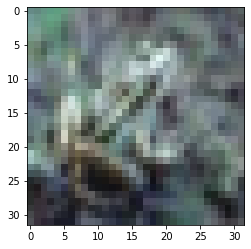

In [5]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id][0]]} 입니다.')
plt.imshow(test_x[id])
plt.show()

### X : 표준화 Scaling (standardization)

$$ X_{scaled} = {{x_{original} - mean(x)}\over{std(x)} } $$

In [6]:
train_x.shape

(50000, 32, 32, 3)

In [7]:
mean_v, std_v = train_x.mean(), train_x.std()
mean_v, std_v

(120.70756512369792, 64.1500758911213)

In [8]:
train_x_ss = (train_x - mean_v) / std_v
test_x_ss = (test_x - mean_v) / std_v

In [9]:
train_x_ss.mean(), train_x_ss.std()

(-2.5247951877342226e-17, 1.0000000000000022)

### Y : One-Hot Encoding

In [10]:
train_y.shape

(50000, 1)

In [11]:
class_n = len(np.unique(train_y))

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
train_y = to_categorical(train_y, class_n)
test_y = to_categorical(test_y, class_n)

In [14]:
train_x_ss.shape, train_y.shape

((50000, 32, 32, 3), (50000, 10))

### 코드를 완성해주세요!

- 조건
    - **model.fit( ) 을 history 에 담아서 학습 과정의 로그를 남길 것.**
    - EarlyStopping 의 옵션도 조절해보자.
---

- **자유롭게 먼저 해보는 것을 추천**

---

- **구조를 따라서 코딩을 한다면**
    0. Functional, Sequential 중 택일
    1. 인풋레이어
    2. Convolution : 필터수 32개, 사이즈(3, 3), same padding
    3. Convolution : 필터수 32개, 사이즈(3, 3), same padding
    4. BatchNormalization
    5. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
    6. DropOut : 25% 비활성화
    7. Convolution : 필터수 64개, 사이즈(3, 3), same padding
    8. Convolution : 필터수 64개, 사이즈(3, 3), same padding
    9. BatchNormalization
    10. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
    11. DropOut : 25% 비활성화
    12. Flatten( )
    13. Fully Connected Layer : 노드 1024개
    14. BatchNormalization
    15. DropOut : 35% 비활성화
    16. 아웃풋레이어



In [15]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
## Functional API
# 1. 세션 클리어
clear_session()

# 2. 레이어 사슬처럼 엮기
# 인풋레이어
il = Input(shape=(32,32,3))
# Convolution : 필터수 32개, 사이즈(3, 3), same padding
hl = Conv2D(filters=32,            # 새롭게 제작하려는 feature map의 수
            kernel_size=(3,3),     # 훑는 filter의 가로세로 사이즈
            strides=(1,1),         # filter가 훑을 때, 세세하게 훑을 것인가 좀 더 거칠게 훑을 것인가 조정
            padding='same',        # 덧붙임 : 1. 외곽의 정보를 더 반영하려고 | 2. feature map의 가로세로 사이즈를 유지하려고 
            activation='relu')(il) # 주의
# Convolution : 필터수 32개, 사이즈(3, 3), same padding
hl = Conv2D(filters=32,            # 새롭게 제작하려는 feature map의 수
            kernel_size=(3,3),     # 훑는 filter의 가로세로 사이즈
            strides=(1,1),         # filter가 훑을 때, 세세하게 훑을 것인가 좀 더 거칠게 훑을 것인가 조정
            padding='same',        # 덧붙임 : 1. 외곽의 정보를 더 반영하려고 | 2. feature map의 가로세로 사이즈를 유지하려고 
            activation='relu')(hl) # 주의
# BatchNormalization
hl = BatchNormalization()(hl)
# MaxPooling : 사이즈(2,2) 스트라이드(2,2)
hl = MaxPool2D(pool_size=(2,2),    # pooling filter의 가로세로 사이즈
               strides=(2,2))(hl)  # 기본적으로 pool_size를 따라감
# DropOut : 25% 비활성화
hl = Dropout(0.25)(hl)

# Convolution : 필터수 64개, 사이즈(3, 3), same padding
hl = Conv2D(filters=64,            # 새롭게 제작하려는 feature map의 수
            kernel_size=(3,3),     # 훑는 filter의 가로세로 사이즈
            strides=(1,1),         # filter가 훑을 때, 세세하게 훑을 것인가 좀 더 거칠게 훑을 것인가 조정
            padding='same',        # 덧붙임 : 1. 외곽의 정보를 더 반영하려고 | 2. feature map의 가로세로 사이즈를 유지하려고 
            activation='relu')(hl) # 주의
# Convolution : 필터수 64개, 사이즈(3, 3), same padding
hl = Conv2D(filters=64,            # 새롭게 제작하려는 feature map의 수
            kernel_size=(3,3),     # 훑는 filter의 가로세로 사이즈
            strides=(1,1),         # filter가 훑을 때, 세세하게 훑을 것인가 좀 더 거칠게 훑을 것인가 조정
            padding='same',        # 덧붙임 : 1. 외곽의 정보를 더 반영하려고 | 2. feature map의 가로세로 사이즈를 유지하려고 
            activation='relu')(hl) # 주의
# BatchNormalization
hl = BatchNormalization()(hl)
# MaxPooling : 사이즈(2,2) 스트라이드(2,2)
hl = MaxPool2D(pool_size=(2,2),    # pooling filter의 가로세로 사이즈
               strides=(2,2))(hl)  # 기본적으로 pool_size를 따라감
# DropOut : 25% 비활성화
hl = Dropout(0.25)(hl)

# Flatten( )
hl = Flatten()(hl)
# Fully Connected Layer : 노드 1024개
hl = Dense(1024, activation='relu')(hl)
# BatchNormalization
hl = BatchNormalization()(hl)
# DropOut : 35% 비활성화
hl = Dropout(0.35)(hl)
# 아웃풋레이어
ol = Dense(10, activation='softmax')(hl)

# 3. 모델의 시작과 끝 지정
model = Model(il, ol)

# 4. 컴파일
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],
              optimizer=Adam() )

# 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0     

In [17]:
# model.fit( ) 을 history 에 담아서 학습 과정의 로그를 남길 것.
# EarlyStopping 의 옵션도 조절해보자.
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=6,
                   verbose=1,
                   restore_best_weights=True)

In [19]:
history = model.fit(train_x_ss, train_y, epochs=1000, verbose=1,
                    validation_split=0.2, callbacks=[es], batch_size=64)

Epoch 1/1000
625/625 [==============================] - 19s 11ms/step - loss: 1.5571 - accuracy: 0.4860 - val_loss: 1.1537 - val_accuracy: 0.6047
Epoch 2/1000
625/625 [==============================] - 7s 11ms/step - loss: 1.0227 - accuracy: 0.6425 - val_loss: 0.9844 - val_accuracy: 0.6612
Epoch 3/1000
625/625 [==============================] - 7s 11ms/step - loss: 0.8538 - accuracy: 0.7007 - val_loss: 0.8915 - val_accuracy: 0.6949
Epoch 4/1000
625/625 [==============================] - 7s 11ms/step - loss: 0.7397 - accuracy: 0.7415 - val_loss: 0.8022 - val_accuracy: 0.7279
Epoch 5/1000
625/625 [==============================] - 7s 11ms/step - loss: 0.6573 - accuracy: 0.7696 - val_loss: 0.7642 - val_accuracy: 0.7442
Epoch 6/1000
625/625 [==============================] - 6s 10ms/step - loss: 0.5764 - accuracy: 0.7972 - val_loss: 0.7435 - val_accuracy: 0.7580
Epoch 7/1000
625/625 [==============================] - 7s 11ms/step - loss: 0.5087 - accuracy: 0.8210 - val_loss: 0.7751 - val_a

### 성능 평가

In [21]:
performance_test = model.evaluate(test_x, test_y, batch_size=100)

print('Test Loss : {:.6f},  Test Accuracy : {:.3f}%'.format(performance_test[0], performance_test[1]*100))

100/100 [==============================] - 1s 4ms/step - loss: 179.7895 - accuracy: 0.2852
Test Loss : 179.789536,  Test Accuracy : 28.520%


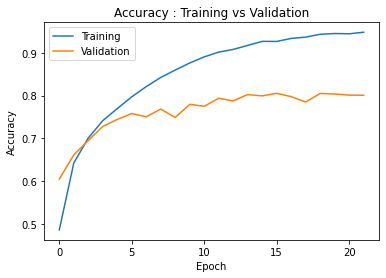

In [22]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

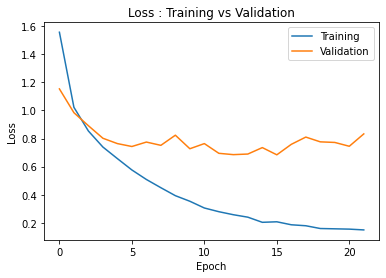

In [23]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [24]:
# 원핫 인코딩 해제 : 카테고리 중 가장 높은 값
train_y = train_y.argmax(axis=1)
test_y = test_y.argmax(axis=1)

In [25]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y, single_pred_train)
logi_test_accuracy = accuracy_score(test_y, single_pred_test)

print('CNN')
print(f'트레이닝 정확도 : {logi_train_accuracy*100:.2f}%')
print(f'테스트 정확도 : {logi_test_accuracy*100:.2f}%')

313/313 [==============================] - 1s 2ms/step
CNN
트레이닝 정확도 : 30.24%
테스트 정확도 : 28.52%


id = 9646
다음 그림은 Dog 입니다.
모델의 예측 : Automobile
모델의 카테고리별 확률 : 
{'Airplane': 0.0, 'Automobile': 100.0, 'Bird': 0.0, 'Cat': 0.0, 'Deer': 0.0, 'Dog': 0.0, 'Frog': 0.0, 'Horse': 0.0, 'Ship': 0.0, 'Truck': 0.0}
틀렸어요


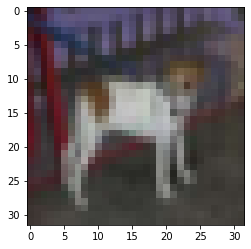

In [29]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id]]} 입니다.')
print(f'모델의 예측 : {labels[single_pred_test[id]]}')

prob = np.floor(pred_test[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)

if test_y[id] == single_pred_test[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
    
plt.imshow(test_x[id].reshape([32,32,-1]))
plt.show()

id = 3021
다음 그림은 Ship 입니다.
모델의 예측 : Airplane
모델의 카테고리별 확률 : 
{'Airplane': 79.0, 'Automobile': 20.0, 'Bird': 0.0, 'Cat': 0.0, 'Deer': 0.0, 'Dog': 0.0, 'Frog': 0.0, 'Horse': 0.0, 'Ship': 0.0, 'Truck': 0.0}
틀렸어요


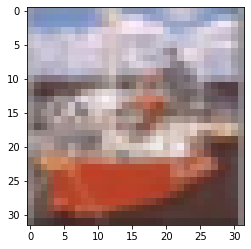

In [34]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]


print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id]]} 입니다.')
print(f'모델의 예측 : {labels[single_pred_test[id]]}')

prob = np.floor(pred_test[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)

if test_y[id] == single_pred_test[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
    
plt.imshow(test_x[id].reshape([32,32,-1]))
plt.show()